# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


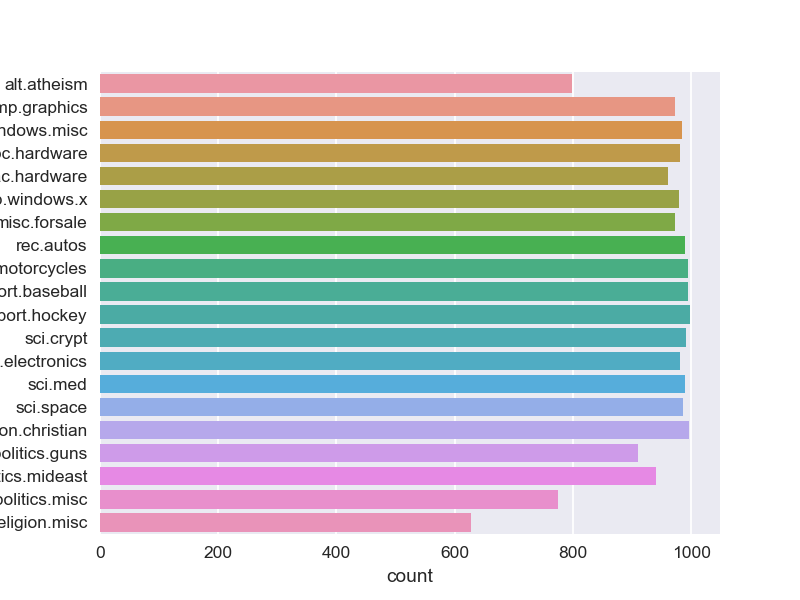

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [ ]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [ ]:
#assignment start

In [3]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization,Dropout,Embedding
from tensorflow.keras.models import Model
from keras import optimizers
import random as rn
import string
from sklearn.metrics import f1_score
from tensorflow import keras
import tensorflow as tf
import numpy as np
import datetime
import os
import math
import pandas as pd
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
#Reference Link : https://stackoverflow.com/questions/19790188/expanding-english-language-con
def decontracted(phrase):
  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [5]:
from google.colab import files
uploaded = files.upload() 
#C:\Users\ASHISH RAI\Desktop\Applied Ai Corse\Ashish_Assignment\Solution\Assignment_ipynb_format\Assignment_21\CNN_with_textdata

Saving document_preprocessed_1.csv to document_preprocessed_1.csv


In [36]:
mkdir documents

In [ ]:
#!pip install unrar
!unrar e /content/documents/documents.rar  /content/documents/

Streaming output truncated to the last 5000 lines.
Extracting  /content/documents/sci.space_60893.txt                        66%  OK 
Extracting  /content/documents/sci.space_60894.txt                        66%  OK 
Extracting  /content/documents/sci.space_60895.txt                        66%  OK 
Extracting  /content/documents/sci.space_60896.txt                        66%  OK 
Extracting  /content/documents/sci.space_60897.txt                        66%  OK 
Extracting  /content/documents/sci.space_60898.txt                        66%  OK 
Extracting  /content/documents/sci.space_60899.txt                        66%  OK 
Extracting  /content/documents/sci.space_60900.txt                        66%  OK 
Extracting  /content/documents/sci.space_60901.txt                        66%  OK 
Extracting  /content/documents/sci.space_60902.txt                        66%  OK 
Extracting  /content/document

In [ ]:
def preprocess(filepath):
  lists = []
  with open('documents/'+filepath,encoding='latin1') as f:
    for line in f:
      inner_list = [line.strip() for line in line.split(' ')]
      line = ' '.join(inner_list)
      lists.append(line)
  #Email
  emails = []
  #SUBJECT
  subject = ""
  for sentence in lists:
    if(sentence is not None):
      if('Subject' in sentence):
       subject = sentence[9:]
  #Generating email feature
  strings = sentence.split(' ')
  for i in strings:
    if(('@' in i)):
      if('<' in i and '>' in i):
        i = re.sub(r'<',' ',i)
        i = re.sub(r'<',' ',i)
      lst = i[i.index('@')+1:].split('.')
      lst = [i for i in lst if (len(i)>2 and i!='com')]
      emails = emails + lst
  text = ""
  for i in range(len(lists)):
    if('Write to:' in lists[i]):
      lists[i] = ''
    if('From:' in lists[i]):
      lists[i] = ''
    if('Subject:' in lists[i]):
      lists[i] = ''
    #remove dots  
    lists[i] = re.sub(r'/.',' ',lists[i])
    lists[i] = re.sub('<.*?>', '', lists[i])
    lists[i] = re.sub('(.*?)', '', lists[i])
    #remove new lines
    lists[i] = re.sub('\n', '', lists[i])
    lists[i] = re.sub('\t', '', lists[i])
    lists[i] = re.sub(r'\w+:\s?','',lists[i])
    lists[i] = decontracted(lists[i])
    #Remove digits ,underscore
    lists[i] = re.sub(r'[0-9]','',lists[i])
    lists[i] = re.sub(r'_',' ',lists[i])
    lists[i] = lists[i].lower()
    lists[i] = re.sub(r"[^a-zA-Z ]", "", lists[i])
    exclude = set(string.punctuation)
    #Remove punctuations
    lists[i] = ''.join(ch for ch in lists[i] if ch not in exclude)
    text = text +' '+ lists[i]
  text = ' '.join(text.split())
  emails = ' '.join(emails)
  #Remove unnacessary characters
  subject = re.sub(r'Re: ', '', subject)
  text = re.sub(r'[^a-zA-Z ]', '', text)
  emails = re.sub(r'[^a-zA-Z ]','',emails)
  subject = re.sub(r'[^a-zA-Z ]','',subject)
  subject = subject.lower()
  emails = emails.lower()
  target_class = filepath.split('_')[0]
  final_text = text + " " + emails + " " + subject
  return (final_text,target_class)    

In [37]:
import re

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('documents') if isfile(join('documents', f))]
TEXT = []
TARGET_CLASS = []
for filename in onlyfiles:
  x,cl = preprocess(filename)
  TEXT.append(x)
  TARGET_CLASS.append(cl)
datafile = pd.DataFrame()
datafile['text'] = TEXT
datafile['target'] = TARGET_CLASS
len(set(list(datafile['target'])))

0

In [38]:
datafile.to_csv('document_preprocessed_1.csv')
from google.colab import files
#files.download('document_preprocessed_1.csv')

In [7]:
from google.colab import files
#uploaded = files.upload()
datafile = pd.read_csv('/content/document_preprocessed_1.csv')

In [8]:
datafile.head()

,Unnamed: 0,text,target
0,0,rocket types,sci.space
1,1,defensive averages third base,rec.sport.baseball
2,2,hasler asco warningplease read,rec.autos
3,3,off the shelf cheap des keyseach machine was...,sci.crypt
4,4,cubs expos roster questions,rec.sport.baseball


In [9]:
TEXT = list(datafile['text'])
TARGET_CLASS = list(datafile['target'])
TEXT = [0 if x!=x else x for x in TEXT]
TEXT = ['' if x == 0 else x for x in TEXT]
X_train, X_test, y_train, y_test = train_test_split(TEXT,TARGET_CLASS , test_size=0.25, random_state=42)
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)
train_docs = t.texts_to_sequences(X_train)
test_docs = t.texts_to_sequences(X_test)
train_docs_new = []
y_train_new = []
for i in range(len(train_docs)):
  if(len(train_docs[i])<600):
     train_docs_new.append(train_docs[i])
     y_train_new.append(y_train[i])
test_docs_new = []
y_test_new = []
for i in range(len(test_docs)):
  if(len(test_docs[i])<600):
    test_docs_new.append(test_docs[i])
    y_test_new.append(y_test[i])

(array([4.500e+01, 0.000e+00, 6.870e+02, 0.000e+00, 0.000e+00, 2.179e+03,
        0.000e+00, 3.078e+03, 0.000e+00, 0.000e+00, 2.933e+03, 0.000e+00,
        2.756e+03, 0.000e+00, 0.000e+00, 2.435e+03, 0.000e+00, 1.567e+03,
        0.000e+00, 0.000e+00, 1.155e+03, 0.000e+00, 8.860e+02, 0.000e+00,
        0.000e+00, 4.470e+02, 0.000e+00, 3.130e+02, 0.000e+00, 0.000e+00,
        1.640e+02, 0.000e+00, 8.300e+01, 0.000e+00, 0.000e+00, 7.500e+01,
        0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00,
        1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <a list of 50 Patch objects

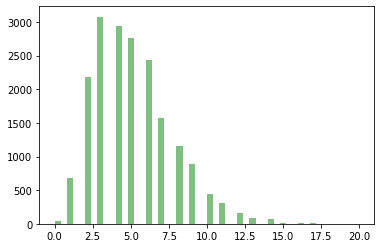

In [10]:
all_lengths = [len(i) for i in train_docs_new] + [len(i) for i in test_docs_new]
import matplotlib.pyplot as plt
plt.hist(all_lengths, 50, facecolor='green', alpha=0.5)

In [11]:
del train_docs,y_train,test_docs,y_test

In [12]:
padded_train_docs = pad_sequences(train_docs_new, maxlen=600, padding='post')
padded_test_docs = pad_sequences(test_docs_new, maxlen=600, padding='post')
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(np.array(y_train_new).reshape(-1,1))
y_train = ohe.transform(np.array(y_train_new).reshape(-1,1))
y_test = ohe.transform(np.array(y_test_new).reshape(-1,1))

In [ ]:
print(padded_train_docs.shape)
print(y_train.shape)
print(y_test.shape)
print(padded_test_docs.shape)
print(output.shape)
print(input_layer.shape)
print(y_test.shape)
print(padded_test_docs.shape)
print(output.shape)
print(input_layer.shape)

(14121, 600)
(14121, 21)
(4708, 21)
(4708, 600)
(None, 21)
(None, 600)
(4708, 21)
(4708, 600)
(None, 21)
(None, 600)


In [13]:
import numpy
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [14]:
input_layer = Input(shape=(600,))
embedding_layer = Embedding(input_dim =138336 ,output_dim = 100 , input_length =600)(input_layer)
conv_1_1 = Conv1D(4,11, strides=2, padding="same",data_format="channels_last",dilation_rate=1,groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None)(embedding_layer)
conv_1_2 = Conv1D(4,9, strides=2, padding="same",data_format="channels_last",dilation_rate=1,groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None)(embedding_layer)
conv_1_3 = Conv1D(4,7, strides=2, padding="same",data_format="channels_last",dilation_rate=1,groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None)(embedding_layer)
concate = keras.layers.Concatenate(axis=-1)([conv_1_1, conv_1_2, conv_1_3])
pool_1 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same', data_format='channels_last') (concate)
conv_2_1 = keras.layers.Conv1D(6,7, strides=2, padding="same",data_format="channels_last",dilation_rate=1,groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None)(pool_1)
conv_2_2 = keras.layers.Conv1D(6,5, strides=2, padding='same', data_format='channels_last', dilation_rate=1,groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None)(pool_1)
conv_2_3 = keras.layers.Conv1D(6,3, strides=2, padding='same', data_format='channels_last', dilation_rate=1,groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros",kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None)(pool_1)
concate_2 = keras.layers.Concatenate(axis=-1)([conv_2_1, conv_2_2, conv_2_3])
pool_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same', data_format='channels_last')(concate_2)
conv_3 = Conv1D(20,3,strides=2, padding='same')(pool_2)
flat_1 = Flatten()(conv_3)
drop_1 = Dropout(0.3)(flat_1)
dense_1 = Dense(32,activation='tanh')(drop_1)
output = Dense(21,activation='softmax', kernel_initializer='random_uniform')(dense_1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
os.mkdir(os.getcwd()+'/'+'model_save22')
filepath="model_save22/best_model_L.h5"
save_checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=0,save_best_only=False,save_weights_only=False,mode="auto",save_freq="epoch",options=None)

In [ ]:
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard (
    log_dir='logs', histogram_freq=0, write_graph=True,
    write_images=False, write_steps_per_second=False, update_freq='epoch',
    profile_batch=0, embeddings_freq=0, embeddings_metadata=None
)


In [ ]:
model = Model(inputs=input_layer,outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
# summarize the model
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 600, 100)     13833600    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 300, 4)       4404        ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 300, 4)       3604        ['embedding[0][0]']              
                                                                                            

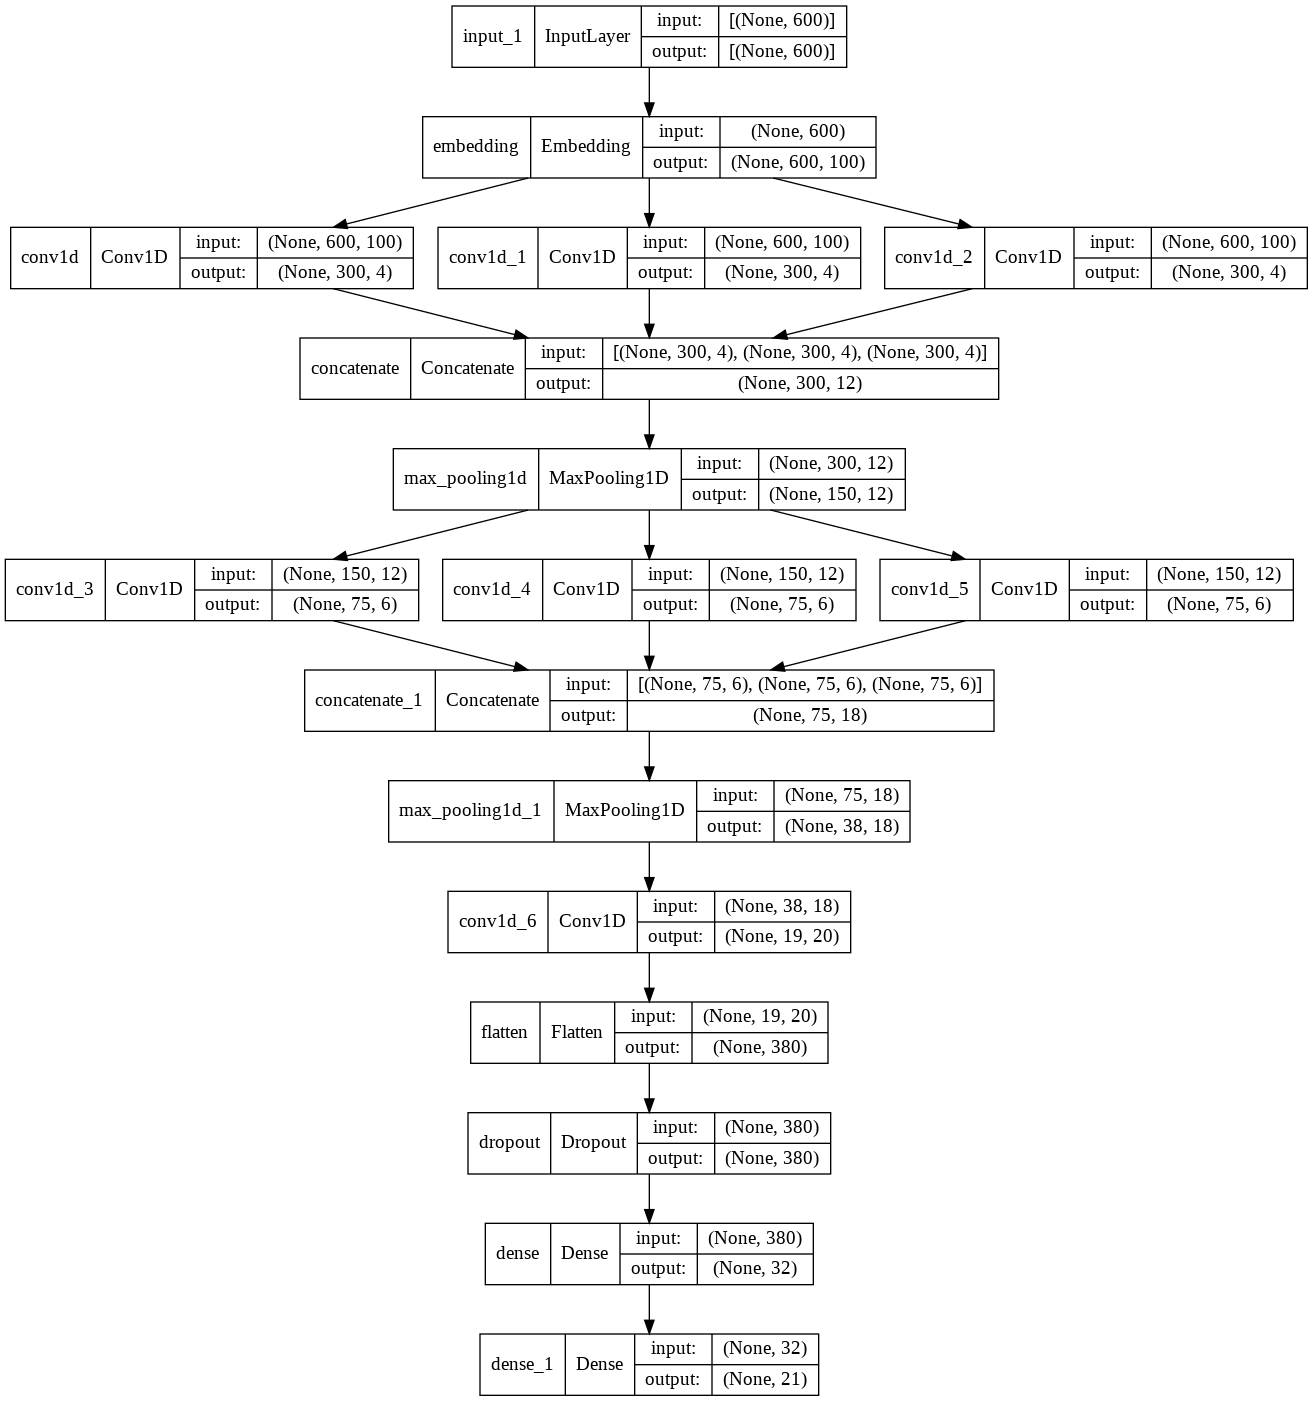

In [ ]:

dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Epoch 1/15
442/442 [==============================] - 128s 290ms/step - loss: 0.1917 - accuracy: 0.9521 - val_loss: 1.5058 - val_accuracy: 0.7364
Epoch 2/15
442/442 [==============================] - 128s 290ms/step - loss: 0.1996 - accuracy: 0.9492 - val_loss: 1.4871 - val_accuracy: 0.7377
Epoch 3/15
442/442 [==============================] - 128s 289ms/step - loss: 0.1878 - accuracy: 0.9499 - val_loss: 1.5195 - val_accuracy: 0.7377
Epoch 4/15
442/442 [==============================] - 128s 290ms/step - loss: 0.1815 - accuracy: 0.9520 - val_loss: 1.5224 - val_accuracy: 0.7411
Epoch 5/15
442/442 [==============================] - 128s 290ms/step - loss: 0.1782 - accuracy: 0.9552 - val_loss: 1.5179 - val_accuracy: 0.7373
Epoch 6/15
442/442 [==============================] - 128s 290ms/step - loss: 0.1792 - accuracy: 0.9518 - val_loss: 1.5354 - val_accuracy: 0.7334
Epoch 7/15
442/442 [==============================] - 128s 290ms/step - loss: 0.1651 - accuracy: 0.9567 - val_loss: 1.5219 -

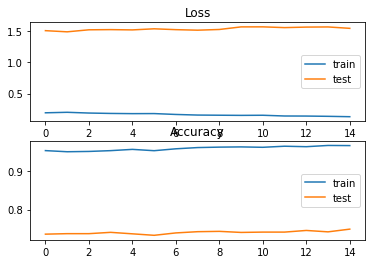

In [ ]:
import numpy as np
history = model.fit(padded_train_docs,y_train,validation_data=(padded_test_docs,y_test),epochs = 15)  # due to wrong batch size it was failing
#evaluate the model
_,train_acc = model.evaluate((padded_train_docs), (y_train), verbose=0)
_,test_acc = model.evaluate((padded_test_docs), (y_test), verbose=0)
print('Train Accurcay: %.3f, Test Accuracy: %.3f' % (train_acc*100, test_acc*100))
# plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(padded_test_docs, verbose=0)
# predict crisp classes for test set
yhat_classes = (model.predict(padded_test_docs) > 0.5).astype("int32")#np.argmax(model.predict(padded_test_docs), axis=-1)
#(model.predict(padded_test_docs) > 0.5).astype("int32")

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.743840
Precision: 0.764796
Recall: 0.743840
F1 score: 0.754172


In [21]:
TEXT = list(datafile['text'])
TARGET_CLASS = list(datafile['target'])
TEXT = [0 if x!=x else x for x in TEXT]
TEXT = ['' if x == 0 else x for x in TEXT]
X_train, X_test, y_train, y_test = train_test_split(TEXT,TARGET_CLASS , test_size=0.25, random_state=42)
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(X_train)
train_docs = tk.texts_to_sequences(X_train)
test_docs = tk.texts_to_sequences(X_test)
train_docs_new = []
y_train_new = []
for i in range(len(train_docs)):
  if(len(train_docs[i])<1500):
     train_docs_new.append(train_docs[i])
     y_train_new.append(y_train[i])
test_docs_new = []
y_test_new = []
for i in range(len(test_docs)):
  if(len(test_docs[i])<1500):
    test_docs_new.append(test_docs[i])
    y_test_new.append(y_test[i])

(array([1.100e+01, 1.190e+02, 1.440e+02, 3.600e+02, 5.090e+02, 6.970e+02,
        1.144e+03, 1.012e+03, 1.082e+03, 1.041e+03, 1.611e+03, 1.121e+03,
        1.073e+03, 1.466e+03, 9.300e+02, 8.770e+02, 1.095e+03, 6.620e+02,
        5.140e+02, 4.320e+02, 6.030e+02, 4.300e+02, 2.610e+02, 4.290e+02,
        1.970e+02, 1.690e+02, 2.770e+02, 1.180e+02, 1.070e+02, 1.210e+02,
        5.600e+01, 2.700e+01, 2.100e+01, 1.500e+01, 1.000e+01, 7.000e+00,
        3.600e+01, 5.000e+00, 1.000e+01, 1.000e+00, 8.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00]),
 array([  2. ,   4.3,   6.6,   8.9,  11.2,  13.5,  15.8,  18.1,  20.4,
         22.7,  25. ,  27.3,  29.6,  31.9,  34.2,  36.5,  38.8,  41.1,
         43.4,  45.7,  48. ,  50.3,  52.6,  54.9,  57.2,  59.5,  61.8,
         64.1,  66.4,  68.7,  71. ,  73.3,  75.6,  77.9,  80.2,  82.5,
         84.8,  87.1,  89.4,  91.7,  94. ,  96.3,  98.6, 100.9, 103.2,
        105.5, 107.8,

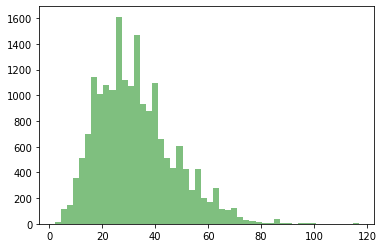

In [24]:
all_lengths = [len(i) for i in train_docs_new] + [len(i) for i in test_docs_new]
import matplotlib.pyplot as plt
plt.hist(all_lengths, 50, facecolor='green', alpha=0.5)

In [25]:
# Padding
train_data = pad_sequences(train_docs_new, maxlen=1500, padding='post')
test_data = pad_sequences(test_docs_new, maxlen=1500, padding='post')

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(np.array(y_train_new).reshape(-1,1))
y_train = ohe.transform(np.array(y_train_new).reshape(-1,1))
y_test = ohe.transform(np.array(y_test_new).reshape(-1,1))


In [27]:
input_layer = Input(shape=(1500,))
embedding_layer = Embedding(input_dim =29 ,output_dim = 100 , input_length =1500)(input_layer)
conv_1 = Conv1D(4,11, strides=2, padding='same', data_format='channels_last', dilation_rate=1)(embedding_layer)
conv_2 = Conv1D(4,9, strides=2, padding='same', data_format='channels_last', dilation_rate=1) (embedding_layer)
pool_1 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same', data_format='channels_last')(embedding_layer)
conv_3 = keras.layers.Conv1D(6,7, strides=2, padding='same', data_format='channels_last')(embedding_layer)
conv_4 = keras.layers.Conv1D(6,5, strides=2, padding='same', data_format='channels_last')(embedding_layer)
pool_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same', data_format='channels_last')(conv_4)
flat_1 = Flatten()(pool_2)
drop_1 = Dropout(0.2)(flat_1)
dense_1 = Dense(32,activation='tanh')(drop_1)
output = Dense(21,activation='softmax', kernel_initializer='random_uniform')(dense_1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
os.mkdir(os.getcwd()+'/'+'model_save44')
filepath="model_save44/best_model_L.h5"
save_checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1)

In [ ]:
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [28]:
model1 = Model(inputs=input_layer,outputs=output)
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
# summarize the model
print(model1.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1500)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 1500, 100)         2900      
                                                                 
 conv1d_14 (Conv1D)          (None, 750, 6)            3006      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 375, 6)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2250)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2250)              0         
                                                           

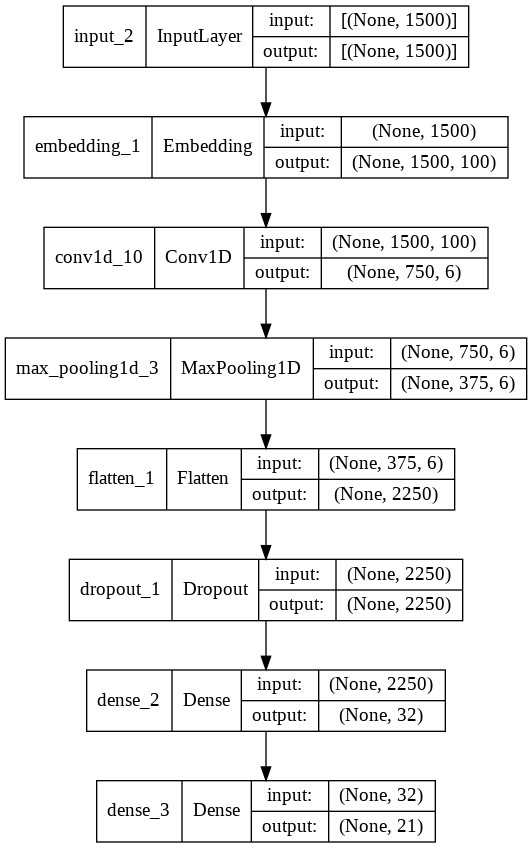

In [ ]:

dot_img_file = '/tmp/model_2.png'
tf.keras.utils.plot_model(model1, to_file=dot_img_file, show_shapes=True)

Epoch 1/30
111/111 [==============================] - 38s 342ms/step - loss: 2.9636 - accuracy: 0.0796 - val_loss: 2.9292 - val_accuracy: 0.1003
Epoch 2/30
111/111 [==============================] - 38s 341ms/step - loss: 2.8534 - accuracy: 0.1312 - val_loss: 2.7961 - val_accuracy: 0.1463
Epoch 3/30
111/111 [==============================] - 38s 342ms/step - loss: 2.7405 - accuracy: 0.1759 - val_loss: 2.7034 - val_accuracy: 0.1958
Epoch 4/30
111/111 [==============================] - 38s 341ms/step - loss: 2.6587 - accuracy: 0.1995 - val_loss: 2.6258 - val_accuracy: 0.2141
Epoch 5/30
111/111 [==============================] - 38s 342ms/step - loss: 2.6017 - accuracy: 0.2170 - val_loss: 2.5844 - val_accuracy: 0.2279
Epoch 6/30
111/111 [==============================] - 38s 342ms/step - loss: 2.5584 - accuracy: 0.2401 - val_loss: 2.5262 - val_accuracy: 0.2608
Epoch 7/30
111/111 [==============================] - 38s 342ms/step - loss: 2.5170 - accuracy: 0.2505 - val_loss: 2.4899 - val_ac

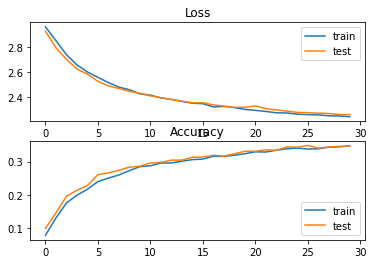

In [31]:
import numpy as np
history = model1.fit(train_data,y_train,validation_data=(test_data,y_test),epochs = 30,batch_size=128)  # due to wrong batch size it was failing
#evaluate the model
_,train_acc = model1.evaluate((train_data), (y_train), verbose=0)
_,test_acc = model1.evaluate((test_data), (y_test), verbose=0)
print('Train Accurcay: %.3f, Test Accuracy: %.3f' % (train_acc*100, test_acc*100))
# plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [32]:
# predict probabilities for test set
yhat_probs = model1.predict(test_data, verbose=0)
# predict crisp classes for test set
yhat_classes = (model1.predict(test_data) > 0.5).astype("int32")#np.argmax(model.predict(padded_test_docs), axis=-1)
#(model.predict(padded_test_docs) > 0.5).astype("int32")

In [34]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.130841
Precision: 0.895349
Recall: 0.130841
F1 score: 0.228317


In [ ]:
  #Below  are observations:
     Model1:
Accuracy: 0.743840
Precision: 0.764796
Recall: 0.743840
F1 score: 0.754172
    Model2:
Accuracy: 0.130841
Precision: 0.895349
Recall: 0.130841
F1 score: 0.228317

conclusion is model1 works better than model2